#### Zaimportowanie bibliotek

In [2]:
import numpy as np
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import os

### 1.Stwórz wykres słupkowy (x – klasa, y – liczba zdjęć w klasie). 
Każdy słupek ma być podpisany odpowiednią liczbą.

In [4]:
x = os.listdir("./flowers" )
print(x)
y = [len(os.listdir(f"./flowers/{i}")) for i in x]
print(y)


['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
[763, 1052, 784, 733, 984]


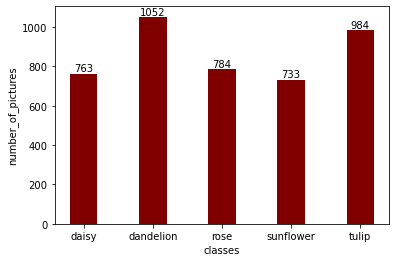

In [5]:
import matplotlib.pyplot as plt
plt.bar(x, y, color='maroon', width= 0.4)
plt.xlabel("classes")
plt.ylabel("number_of_pictures")
for i in range(len(x)):
    plt.text(i,y[i], y[i], ha="center", va="bottom")
plt.show()

### 2.Podziel cały zbiór na zbiór treningowy (70% od całego) i testowy (30% od całego). 

In [7]:
img_rows = 64
img_cols = 64
epochs = 30
batch_size = 32
num_of_train_samples = 3024
num_of_test_samples = 1293

train_datagen = ImageDataGenerator(
            rescale = 1./255,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            validation_split = 0.3) # za pomocą atrybutu validation_split, zbiór został podzielony
train_generator = train_datagen.flow_from_directory(
            'flowers', target_size=(img_rows, img_cols), batch_size=batch_size, class_mode='categorical', subset = 'training')
validation_generator = train_datagen.flow_from_directory(
            'flowers', target_size=(img_rows, img_cols), batch_size=batch_size, class_mode='categorical', subset = 'validation') 

Found 3024 images belonging to 5 classes.
Found 1292 images belonging to 5 classes.


### 3.Zaproponuj własną architekturę klasyfikatora i wytrenuj do najwyższej jakości.

In [9]:
model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape=(img_rows, img_cols, 3), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, (3, 3), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3, 3), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation('softmax'))

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [11]:
history = model.fit_generator(train_generator,
                    steps_per_epoch=num_of_train_samples // batch_size,
                    epochs=epochs,
                    validation_data=validation_generator,
                    validation_steps=num_of_test_samples // batch_size)

<ipython-input-11-dc56ab11d9b5>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/30
94/94 [==============================] - 22s 223ms/step - loss: 1.4095 - accuracy: 0.3636 - val_loss: 1.4171 - val_accuracy: 0.3547
Epoch 2/30
94/94 [==============================] - 19s 201ms/step - loss: 1.2249 - accuracy: 0.4916 - val_loss: 1.1982 - val_accuracy: 0.5133
Epoch 3/30
94/94 [==============================] - 19s 203ms/step - loss: 1.1260 - accuracy: 0.5455 - val_loss: 1.0299 - val_accuracy: 0.5969
Epoch 4/30
94/94 [==============================] - 19s 203ms/step - loss: 1.0592 - accuracy: 0.5939 - val_loss: 1.0111 - val_accuracy: 0.6000
Epoch 5/30
94/94 [==============================] - 19s 202ms/step - loss: 1.0125 - accuracy: 0.6103 - val_loss: 0.9881 - val_accuracy: 0.6297
Epoch 6/30
94/94 [==============================] - 19s 205ms/step - loss: 0.9708 - accuracy: 0.6230 - val_loss: 0.9080 - val_accuracy: 0.6453
Epoch 7/30
94/94 [==============================] - 19s 199ms/step - loss: 0.9271 - accuracy: 0.6400 - val_loss: 0.9277 - val_accuracy: 0.6484

### 4.Stwórz wykres z przebiegiem treningu (loss, accuracy).

In [13]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

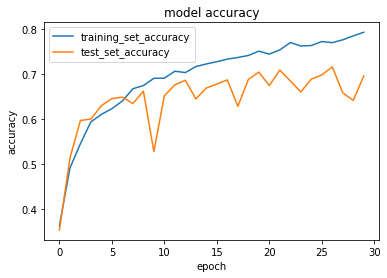

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["training_set_accuracy", 'test_set_accuracy'], loc='upper left')
plt.show()

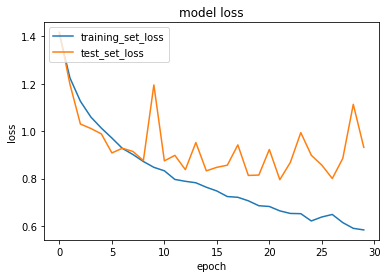

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["training_set_loss", 'test_set_loss'], loc='upper left')
plt.show()

### 5.Sprawdź jakość rozwiązania na zbiorze testowym (możesz wykorzystać classification_report lub confusion_matrix).

In [17]:
Y_pred = model.predict_generator(validation_generator, num_of_test_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

<ipython-input-17-aa3a0db53661>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(validation_generator, num_of_test_samples // batch_size+1)


In [18]:
target_names = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       daisy       0.17      0.19      0.18       228
   dandelion       0.26      0.34      0.29       315
        rose       0.18      0.20      0.19       235
   sunflower       0.18      0.15      0.16       219
       tulip       0.21      0.12      0.15       295

    accuracy                           0.21      1292
   macro avg       0.20      0.20      0.20      1292
weighted avg       0.20      0.21      0.20      1292



#### 6.Wygeneruj nowe zdjęcia przy pomocy przekształcenia zdjęć oryginalnych, tak żeby liczba zdjęć per class w zbiorze treningowym była jednakowa dla wszystkich klas.

In [21]:
x = os.listdir("./flowers" )
y= [len(os.listdir(f"./flowers/{i}")) for i in x]
largest_folder = max(y)
print(largest_folder)

1052


In [26]:
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

datagen = ImageDataGenerator(
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip="nearest")

for i in target_names:
    missing_photos = largest_folder - len(os.listdir(f"./flowers/{i}"))
    img=load_img(f"./flowers/{i}/1.jpg")
    x=img_to_array(img)
    x = x.reshape((1,) + x.shape)
    for batch in datagen.flow(x, batch_size=1, save_to_dir=f'./flowers/{i}',
                              save_prefix='1', save_format='jpeg'):
        
        if missing_photos<=0:
            break
        missing_photos-=1
        


In [27]:
x = os.listdir("./flowers" )
print(x)
y = [len(os.listdir(f"./flowers/{i}")) for i in x]
print(y)


['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
[1052, 1052, 1052, 1052, 1052]


#### 7.Stwórz wykres słupkowy (x – klasa, y – liczba zdjęć w klasie). Każdy słupek ma być podpisany odpowiednią liczbą.


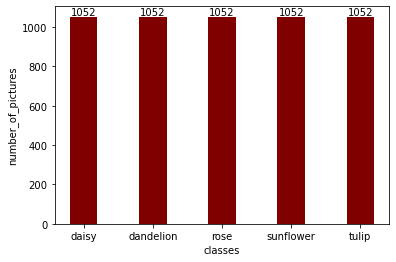

In [30]:
import matplotlib.pyplot as plt
plt.bar(x, y, color='maroon', width= 0.4)
plt.xlabel("classes")
plt.ylabel("number_of_pictures")
for i in range(len(x)):
    plt.text(i,y[i], y[i], ha="center", va="bottom")
plt.show()

#### 8.Wytrenuj klasyfikator z taką samą architekturą na nowym zbiorze.

In [32]:
train_datagen = ImageDataGenerator(
            rescale = 1./255,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            validation_split = 0.3)
train_generator = train_datagen.flow_from_directory(
            'flowers', target_size=(img_rows, img_cols), batch_size=batch_size, class_mode='categorical', subset = 'training')
validation_generator = train_datagen.flow_from_directory(
            'flowers', target_size=(img_rows, img_cols), batch_size=batch_size, class_mode='categorical', subset = 'validation') 

Found 3685 images belonging to 5 classes.
Found 1575 images belonging to 5 classes.


In [33]:
model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape=(img_rows, img_cols, 3), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, (3, 3), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3, 3), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation('softmax'))

In [34]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [35]:
history = model.fit_generator(train_generator,
                    steps_per_epoch=num_of_train_samples // batch_size,
                    epochs=epochs,
                    validation_data=validation_generator,
                    validation_steps=num_of_test_samples // batch_size)

<ipython-input-35-dc56ab11d9b5>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/30
94/94 [==============================] - 21s 211ms/step - loss: 1.3654 - accuracy: 0.4274 - val_loss: 1.0199 - val_accuracy: 0.5734
Epoch 2/30
94/94 [==============================] - 19s 200ms/step - loss: 1.0777 - accuracy: 0.5820 - val_loss: 0.9142 - val_accuracy: 0.6336
Epoch 3/30
94/94 [==============================] - 19s 204ms/step - loss: 0.9962 - accuracy: 0.6233 - val_loss: 0.8882 - val_accuracy: 0.6750
Epoch 4/30
94/94 [==============================] - 19s 199ms/step - loss: 0.9427 - accuracy: 0.6437 - val_loss: 0.7962 - val_accuracy: 0.6820
Epoch 5/30
94/94 [==============================] - 19s 200ms/step - loss: 0.8881 - accuracy: 0.6689 - val_loss: 0.8206 - val_accuracy: 0.6727
Epoch 6/30
94/94 [==============================] - 19s 199ms/step - loss: 0.8708 - accuracy: 0.6823 - val_loss: 0.7787 - val_accuracy: 0.7195
Epoch 7/30
94/94 [==============================] - 20s 209ms/step - loss: 0.8222 - accuracy: 0.6941 - val_loss: 0.7100 - val_accuracy: 0.7242

#### 9.Stwórz wykres z przebiegiem treningu (loss, accuracy).

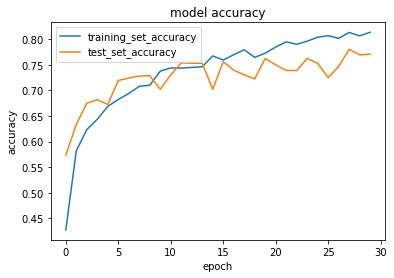

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["training_set_accuracy", 'test_set_accuracy'], loc='upper left')
plt.show()

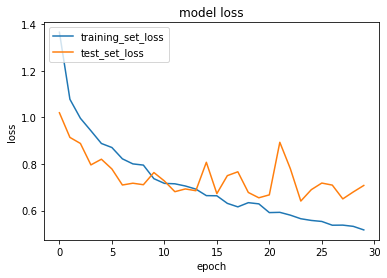

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["training_set_loss", 'test_set_loss'], loc='upper left')
plt.show()